In [1]:
!pip install keras-tuner

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import RandomizedSearchCV,cross_val_score,train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler,RobustScaler,StandardScaler
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,classification_report
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import RandomizedSearchCV,cross_val_score,train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler,RobustScaler,StandardScaler
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,classification_report

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout,BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras.optimizers import Adam
import keras_tuner as kt
import tensorflow as tf
from tensorflow import python
from tensorflow import metrics

import warnings
warnings.filterwarnings('ignore')

# np.random.seed(1)
plt.style.use('ggplot')
import keras_tuner as kt
import tensorflow as tf
from tensorflow import python
from tensorflow import metrics

import warnings
warnings.filterwarnings('ignore')

# np.random.seed(1)
plt.style.use('ggplot')

In [3]:
df = pd.read_csv('air_quality_health_impact_data.csv')
df      

,RecordID,AQI,PM10,PM2_5,NO2,SO2,O3,Temperature,Humidity,WindSpeed,RespiratoryCases,CardiovascularCases,HospitalAdmissions,HealthImpactScore,HealthImpactClass
0,1,187.270059,295.853039,13.038560,6.639263,66.161150,54.624280,5.150335,84.424344,6.137755,7,5,1,97.244041,0.0
1,2,475.357153,246.254703,9.984497,16.318326,90.499523,169.621728,1.543378,46.851415,4.521422,10,2,0,100.000000,0.0
2,3,365.996971,84.443191,23.111340,96.317811,17.875850,9.006794,1.169483,17.806977,11.157384,13,3,0,100.000000,0.0
3,4,299.329242,21.020609,14.273403,81.234403,48.323616,93.161033,21.925276,99.473373,15.302500,8,8,1,100.000000,0.0
4,5,78.009320,16.987667,152.111623,121.235461,90.866167,241.795138,9.217517,24.906837,14.534733,9,0,1,95.182643,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5806,5807,171.112762,11.246387,197.984628,158.643107,17.743678,280.370909,37.359323,61.707640,4.097129,14,5,2,100.000000,4.0
5807,5808,490.691667,275.340762,55.774170,132.336871,29.334724,108.043492,34.532542,21.528555,6.682549,8,6,2,100.000000,3.0
5808,5809,314.841798,41.892699,184.708551,82.105823,68.334578,105.568503,22.975564,92.725625,2.889698,12,2,3,100.000000,1.0
5809,5810,208.080473,165.533785,199.177255,100.796385,87.586488,166.469537,36.090620,25.836286,10.722393,6,2,3,100.000000,4.0


In [10]:
# Display basic dataset information
print("Dataset Info:")
df.info()

# Display first few rows
print("\nPreview of Data:")
df.head()

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Check for duplicates
print("\nDuplicate Rows Count:", df.duplicated().sum())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5811 entries, 2020-01-01 to 2035-11-28
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   AQI                  5811 non-null   float64 
 1   PM10                 5811 non-null   float64 
 2   PM2_5                5811 non-null   float64 
 3   NO2                  5811 non-null   float64 
 4   SO2                  5811 non-null   float64 
 5   O3                   5811 non-null   float64 
 6   Temperature          5811 non-null   float64 
 7   Humidity             5811 non-null   float64 
 8   WindSpeed            5811 non-null   float64 
 9   RespiratoryCases     5811 non-null   int64   
 10  CardiovascularCases  5811 non-null   int64   
 11  HospitalAdmissions   5811 non-null   int64   
 12  HealthImpactScore    5811 non-null   float64 
 13  HealthImpactClass    5811 non-null   float64 
 14  AQI_Category         5811 non-null   cat

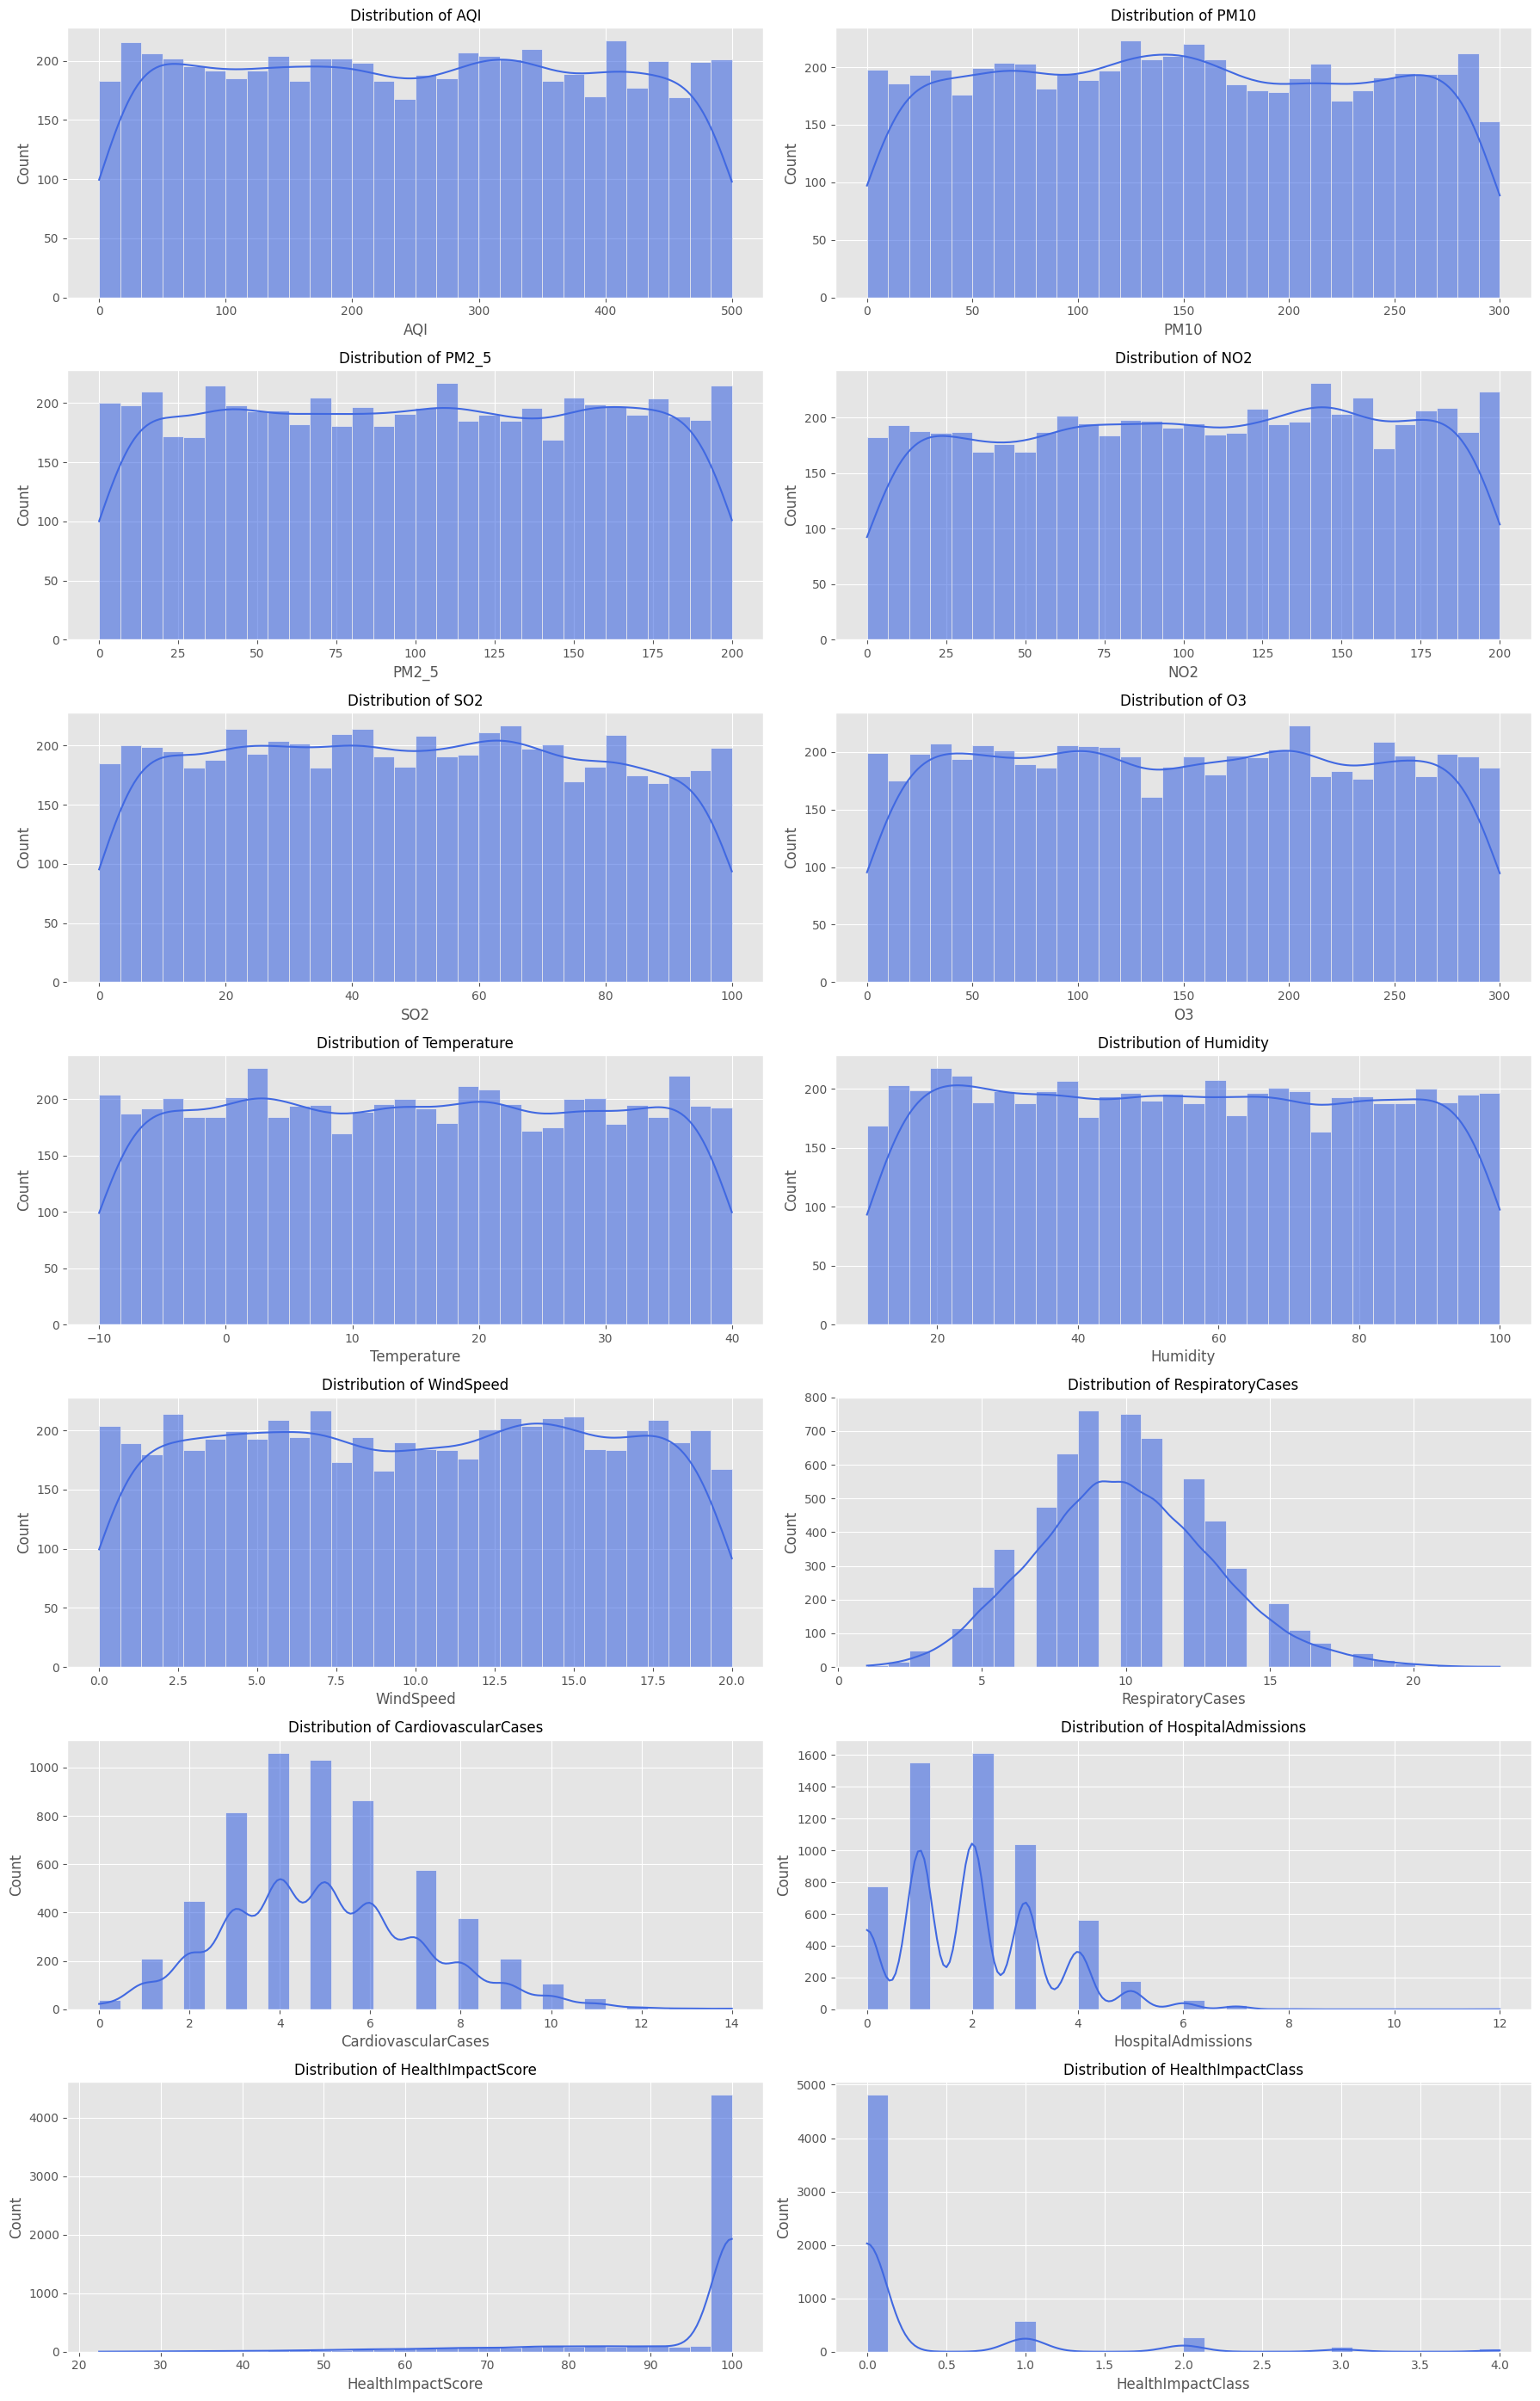

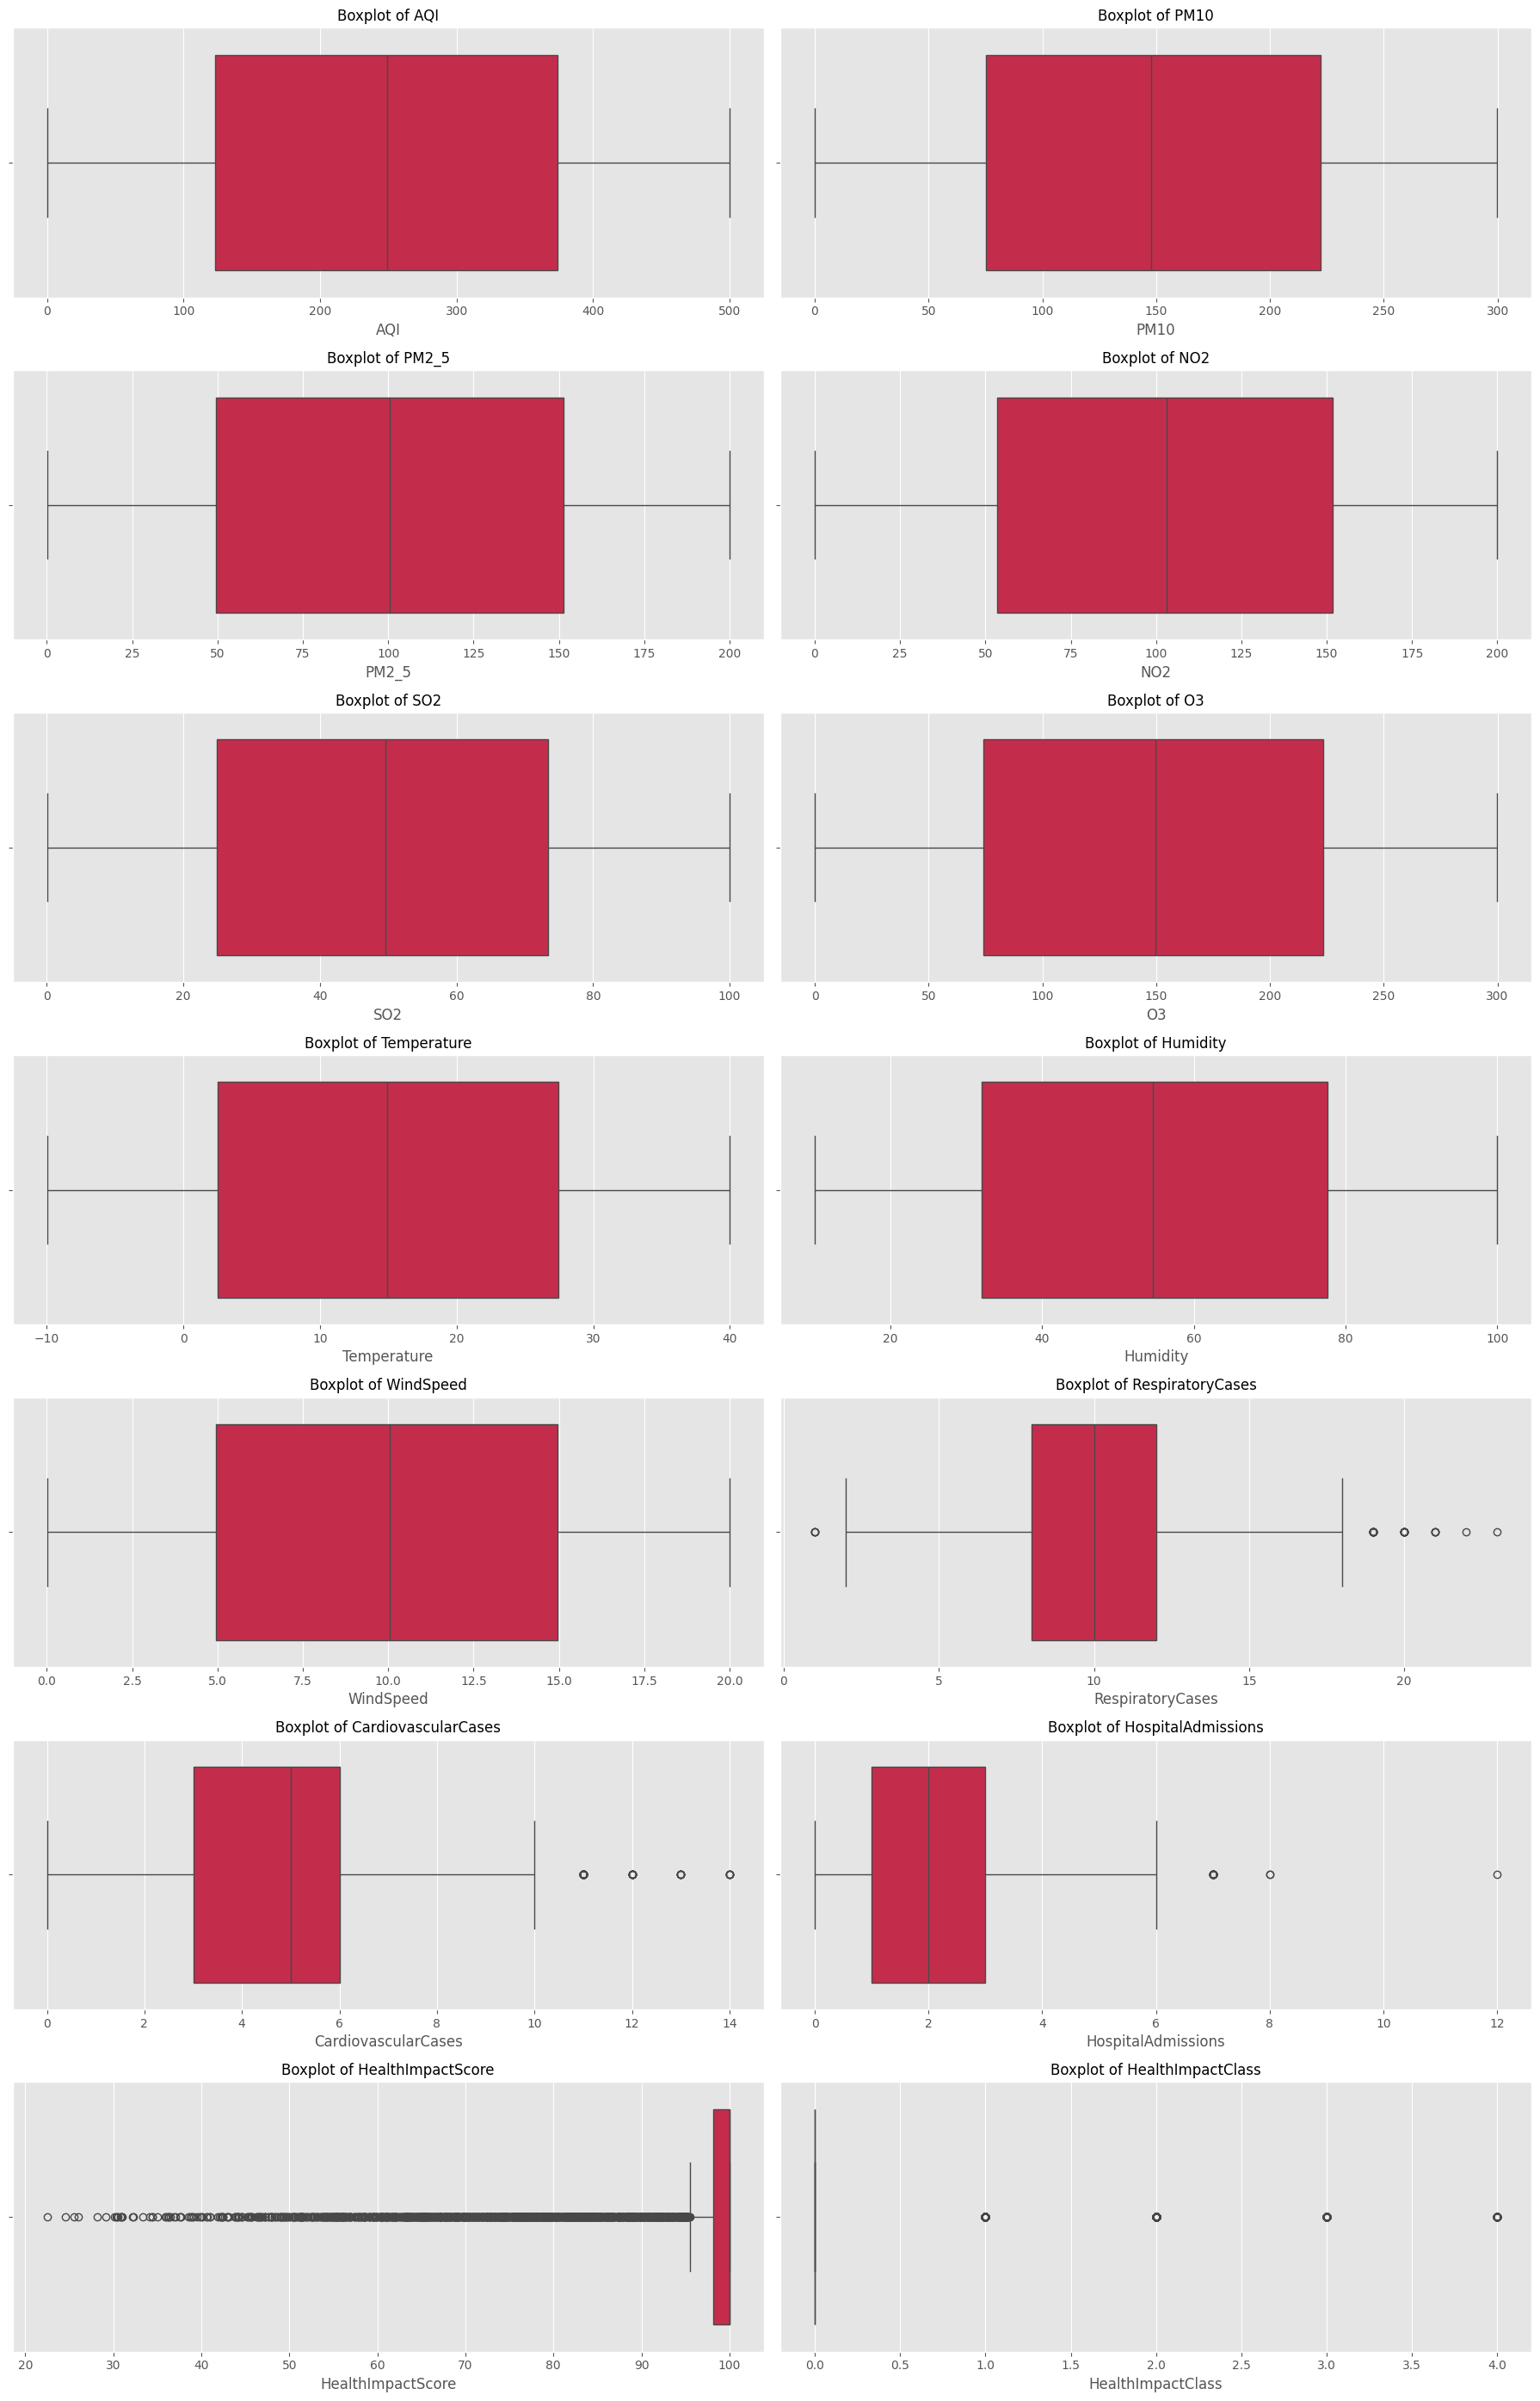

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Drop non-relevant columns (e.g., RecordID if present)
df = df.drop(columns=["RecordID"], errors="ignore")

# Select numerical columns only
numerical_columns = df.select_dtypes(include="number").columns

# Define the number of rows and columns for subplots dynamically
num_features = len(numerical_columns)
num_cols = 2  # Number of columns
num_rows = (num_features // num_cols) + (num_features % num_cols > 0)  # Dynamic row calculation

# Set figure size
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, num_rows * 4))
axes = axes.flatten()  # Flatten axes for easy iteration

# Loop through numerical features and plot histograms & boxplots
for i, column in enumerate(numerical_columns):
    # Histogram
    sns.histplot(df[column], kde=True, bins=30, color="royalblue", alpha=0.6, ax=axes[i])
    axes[i].set_title(f"Distribution of {column}", fontsize=12)
    axes[i].set_xlabel(column)

plt.tight_layout()
plt.show()

# Separate Boxplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, num_rows * 4))
axes = axes.flatten()

for i, column in enumerate(numerical_columns):
    # Boxplot
    sns.boxplot(x=df[column], color="crimson", ax=axes[i])
    axes[i].set_title(f"Boxplot of {column}", fontsize=12)

plt.tight_layout()
plt.show()


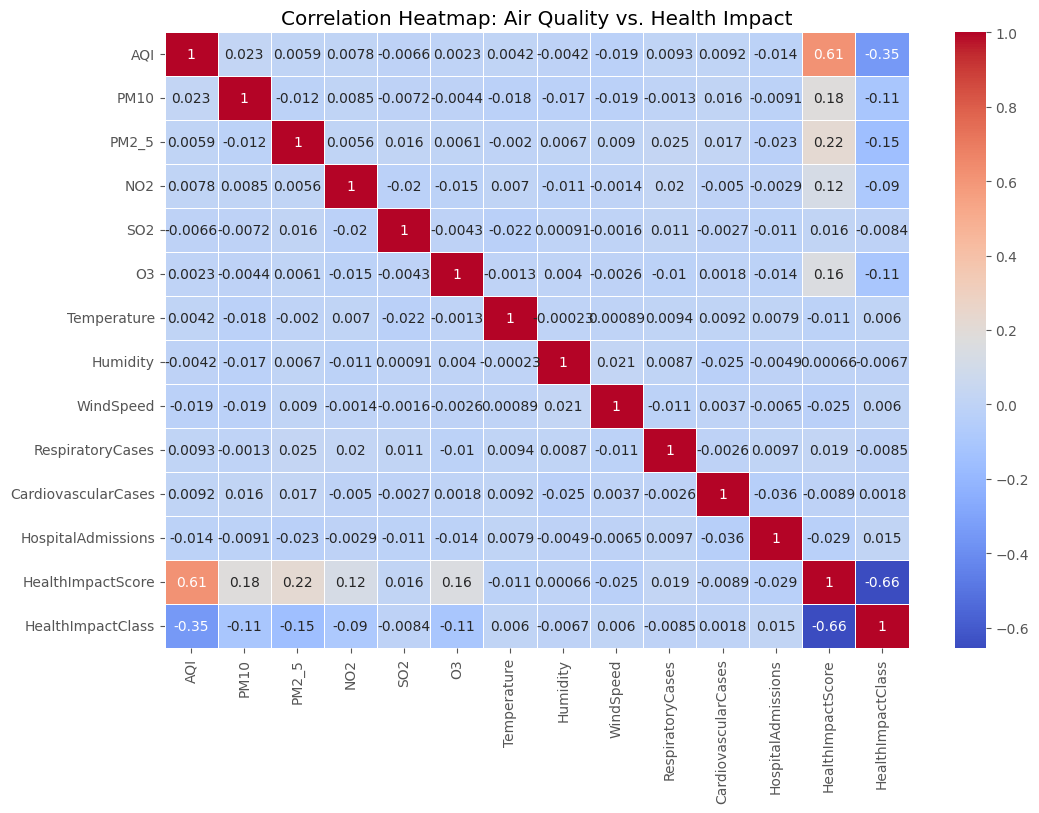

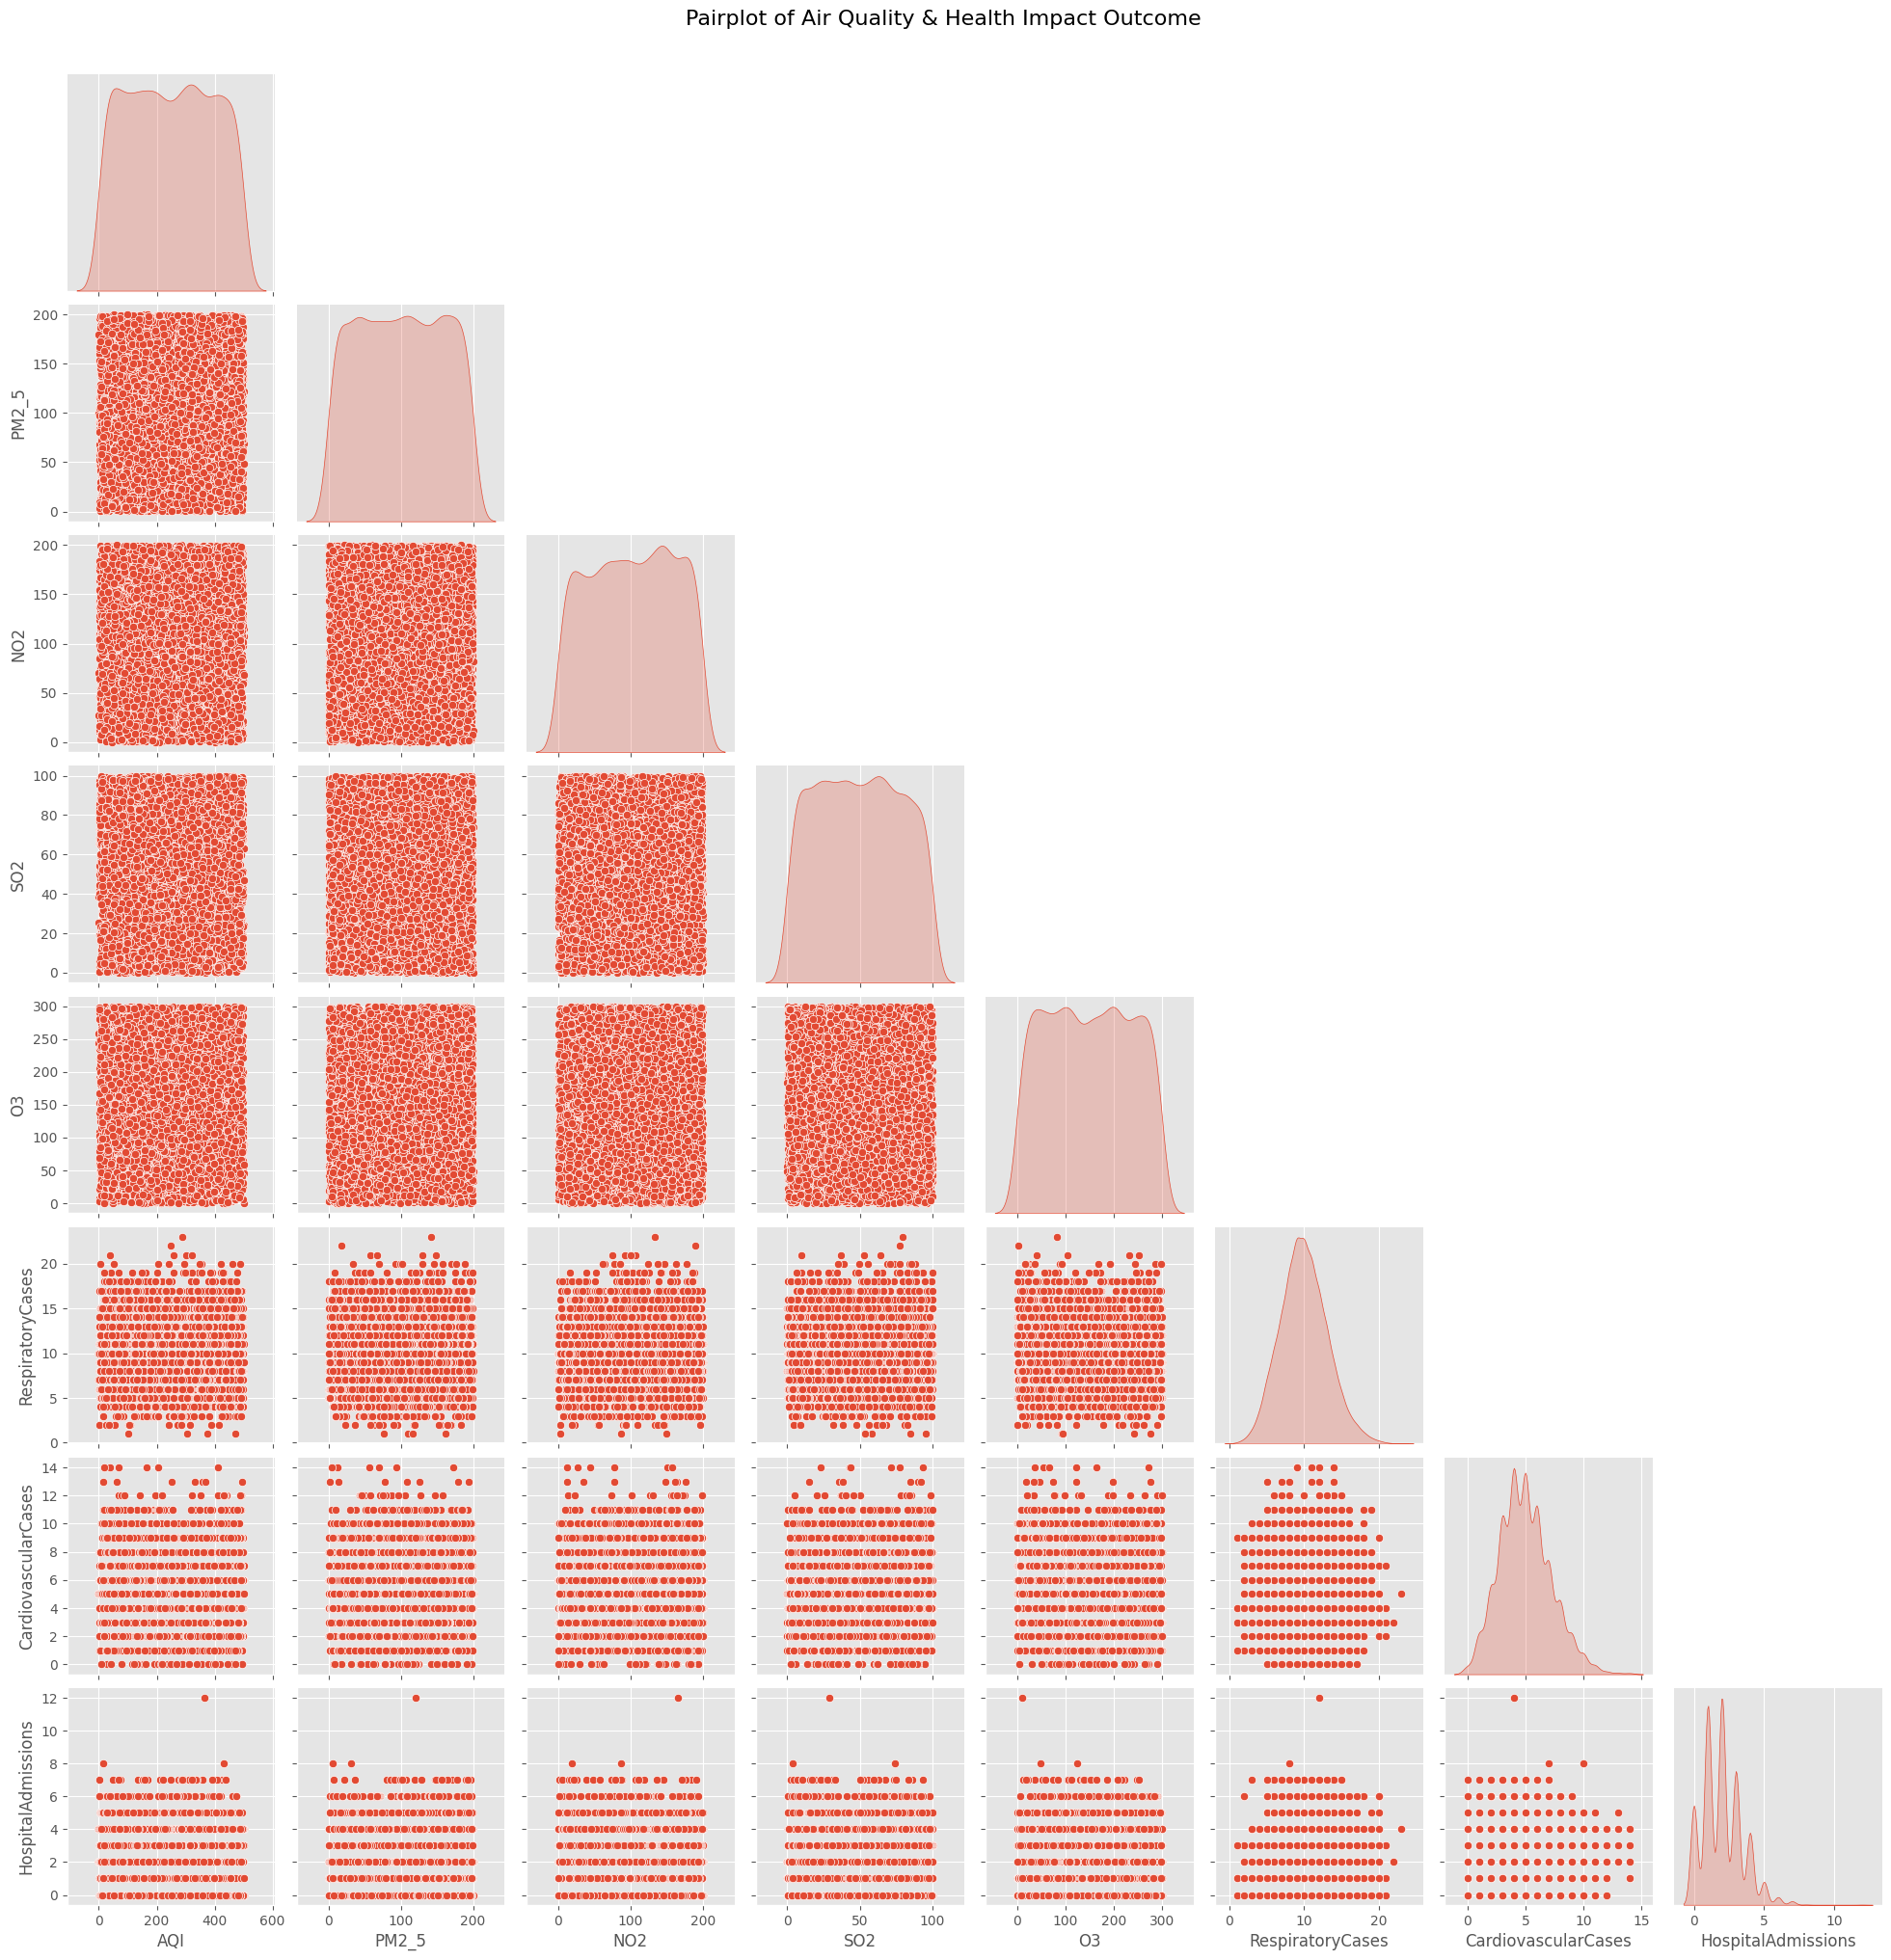

In [6]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap: Air Quality vs. Health Impact")
plt.show()

# Pairplot of Key Features
selected_features = ["AQI", "PM2_5", "NO2", "SO2", "O3", "RespiratoryCases", "CardiovascularCases", "HospitalAdmissions"]

sns.pairplot(df[selected_features], diag_kind="kde", corner=True)
plt.suptitle("Pairplot of Air Quality & Health Impact Outcome", y=1.02 ,fontsize=16)
plt.show()


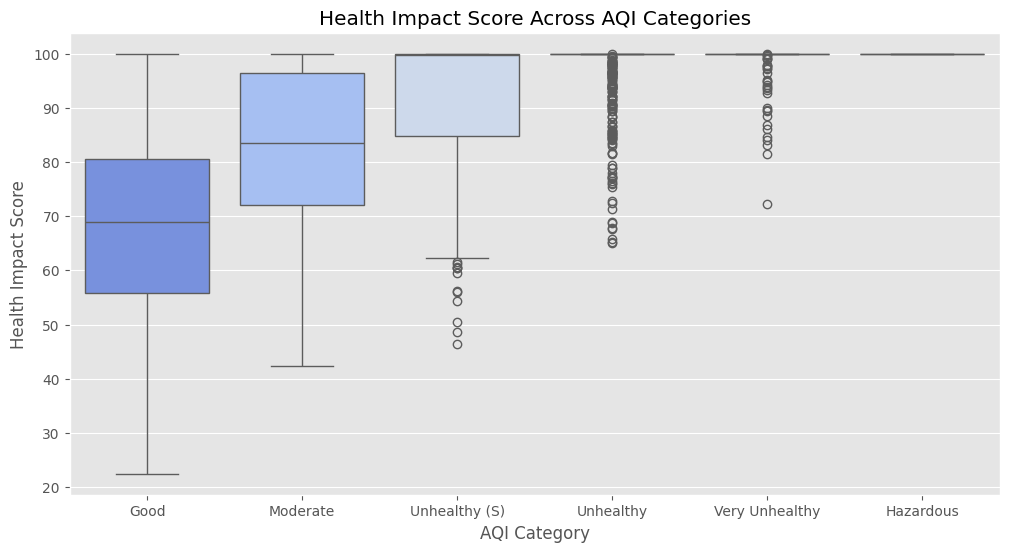

In [7]:
# Define AQI categories
df["AQI_Category"] = pd.cut(df["AQI"], bins=[0, 50, 100, 150, 200, 300, 500],
                            labels=["Good", "Moderate", "Unhealthy (S)", "Unhealthy", "Very Unhealthy", "Hazardous"])

# Boxplot of Health Impact Score Across AQI Categories
plt.figure(figsize=(12, 6))
sns.boxplot(x=df["AQI_Category"], y=df["HealthImpactScore"], palette="coolwarm")
plt.title("Health Impact Score Across AQI Categories")
plt.xlabel("AQI Category")
plt.ylabel("Health Impact Score")
plt.show()


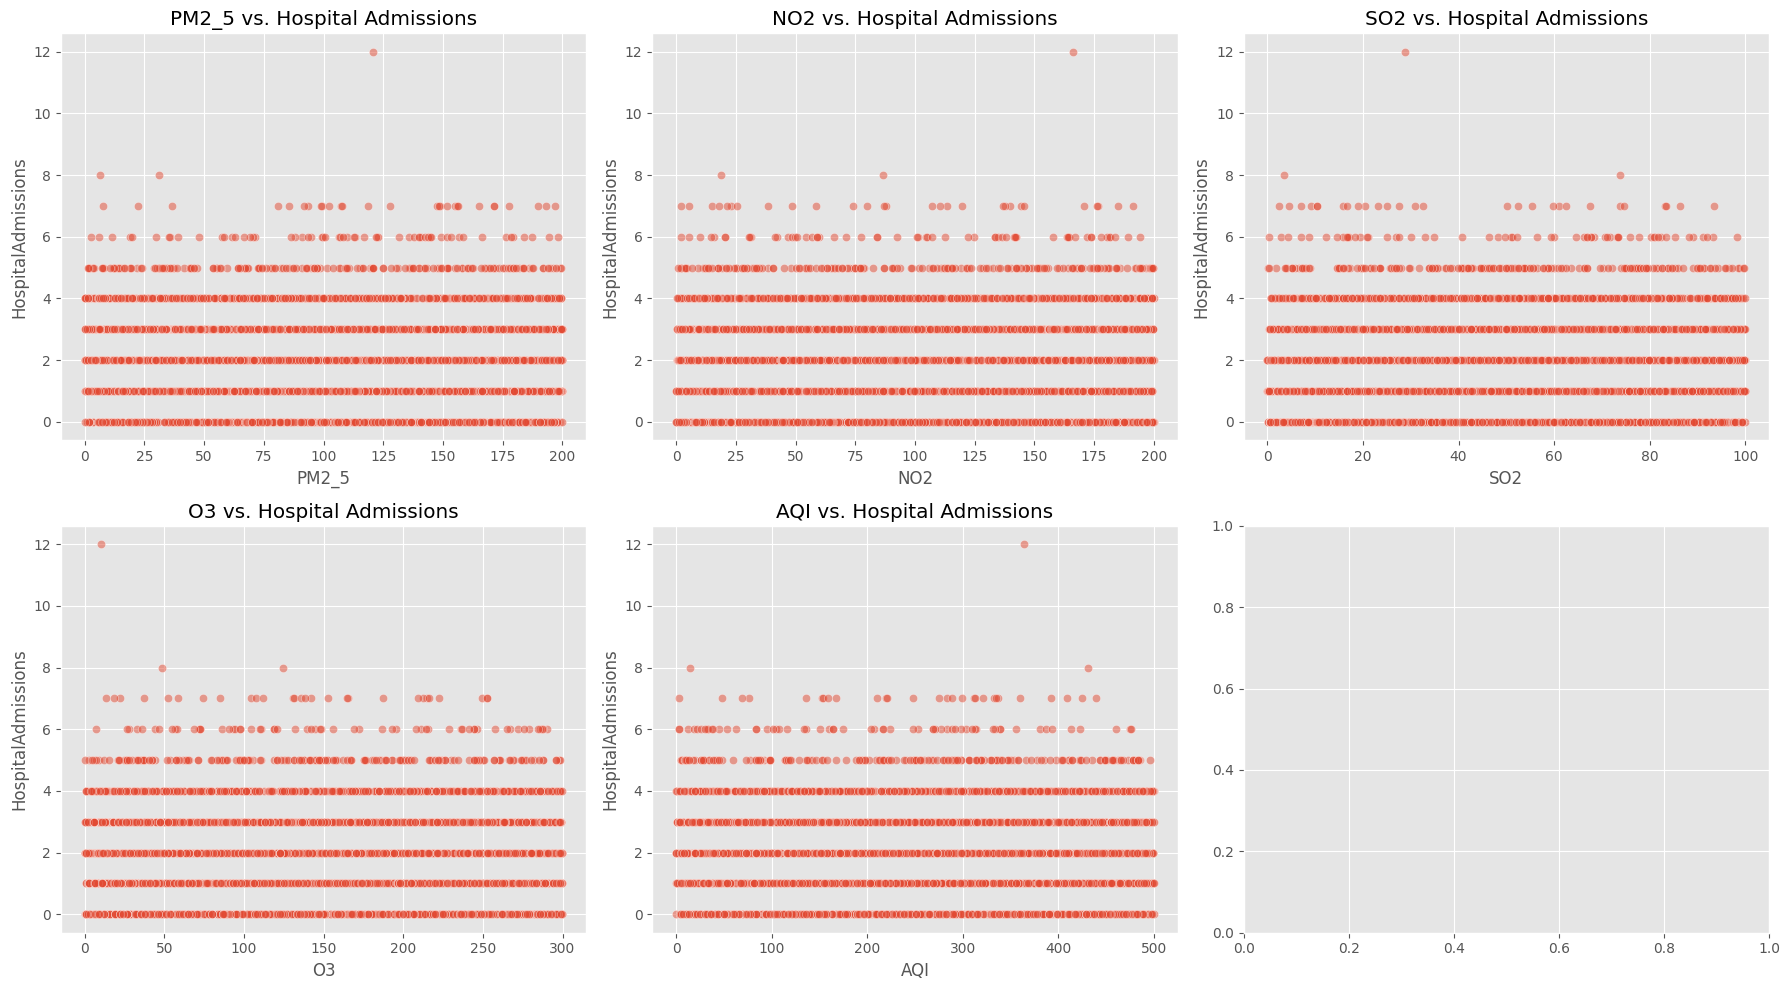

In [8]:
# Scatterplots of Pollutants vs. Hospital Admissions
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

pollutants = ["PM2_5", "NO2", "SO2", "O3", "AQI"]

for i, pollutant in enumerate(pollutants):
    sns.scatterplot(x=df[pollutant], y=df["HospitalAdmissions"], alpha=0.5, ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f"{pollutant} vs. Hospital Admissions")

plt.tight_layout()
plt.show()


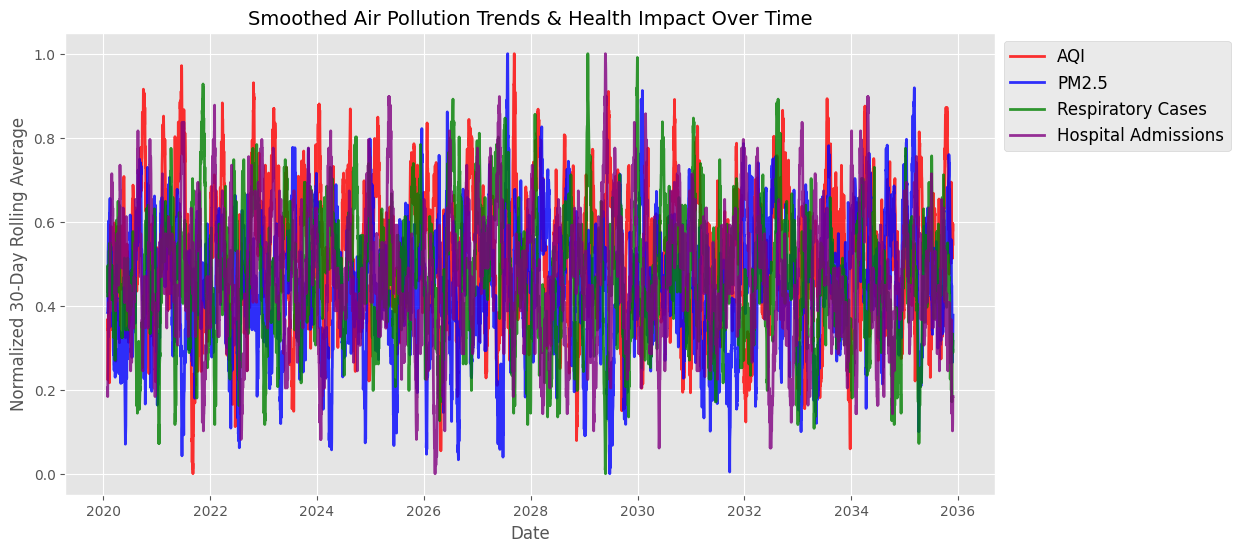

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure Date column exists
df["Date"] = pd.date_range(start="2020-01-01", periods=len(df), freq="D")

# Set Date as index
df.set_index("Date", inplace=True)

# Increase rolling window to smooth fluctuations (e.g., 30 days instead of 7)
df_trends = df[['AQI', 'PM2_5', 'RespiratoryCases', 'HospitalAdmissions']].rolling(window=30).mean()

# Normalize the values for easier comparison
df_trends = (df_trends - df_trends.min()) / (df_trends.max() - df_trends.min())

# Create the plot
plt.figure(figsize=(12, 6))

# Set specific colors for clarity
sns.lineplot(data=df_trends['AQI'], label="AQI", color="red", linewidth=2, alpha=0.8)
sns.lineplot(data=df_trends['PM2_5'], label="PM2.5", color="blue", linewidth=2, alpha=0.8)
sns.lineplot(data=df_trends['RespiratoryCases'], label="Respiratory Cases", color="green", linewidth=2, alpha=0.8)
sns.lineplot(data=df_trends['HospitalAdmissions'], label="Hospital Admissions", color="purple", linewidth=2, alpha=0.8)

# Improve readability
plt.title("Smoothed Air Pollution Trends & Health Impact Over Time", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Normalized 30-Day Rolling Average", fontsize=12)
plt.grid(True)

# Move legend outside for clarity
plt.legend(loc="upper left", bbox_to_anchor=(1, 1), fontsize=12)

# Show updated chart
plt.show()
